In [1]:
import sklearn
from sklearn.linear_model import Ridge
import time
from scipy.io import loadmat
import functionList
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

In [2]:
raw = loadmat(r"C:\Users\parkf\Desktop\summer2021\eegData\smallTrial\335B.mat") #change this to try different one off files
X = raw['data']   #[0][0]['data'] #file format is different from ###L/R.mat vs the sample data
mask = raw['mask']
l = X.shape[0]
chan = 0
memPoints = 12

In [3]:
#holdStack = X
#for i in range(9):
#    X = np.hstack((X,holdStack))

In [4]:
featureMat = functionList.buildFeatureMat(X,memPoints)
xClean = functionList.removeTrash(X,mask,memPoints)
featureMat = functionList.removeTrash(featureMat,mask,memPoints)

crossVal = sklearn.model_selection.KFold(n_splits=10)
folds = [next(crossVal.split(featureMat)) for i in range(10)]
train_in = folds[0][0]
test_in = folds[0][1]

#pred = functionList.predRrOutput(featureMat[train_in,:], featureMat[test_in,:], xClean[train_in], 0, 0)
#not using function list because we need object information:
RR = sklearn.linear_model.Ridge(alpha=0)
RR.fit(featureMat[train_in, :],xClean[train_in])
pred = RR.predict(featureMat[test_in, :])

#pred2 = functionList.predRrOutput(featureMat[:, :], featureMat[:,:], xClean[:], 0, 0)


In [5]:
#print(RR.coef_.shape)
#RR.coef_[0: ,0:] = 0
#for i in range(RR.coef_.shape[0]):
#    RR.coef_[i, i] = 1
#pred = RR.predict(featureMat[test_in, :])

In [6]:
hold = RR.coef_
chCount = hold.shape[0]
featCount = hold.shape[1]
prettyCoef = np.zeros((chCount, chCount, int(featCount/chCount)))
for ch in range(chCount):
    trackCh = 0
    trackMem = 0
    for feat in range(featCount):
        prettyCoef[ch, trackCh, trackMem] = hold[ch, feat]
        trackCh += 1
        if trackCh > chCount-1:
            trackMem += 1
            trackCh = 0
prettyCoef = np.absolute(prettyCoef)

In [7]:
print(train_in.shape)
print(test_in.shape)
#print(pred2.shape)
print(xClean[test_in, 0].shape)
print(pred[:, 0].shape)

print(RR.score(featureMat[test_in, :], xClean[test_in, :]))

(133226,)
(14803,)
(14803,)
(14803,)
0.9549874808349164


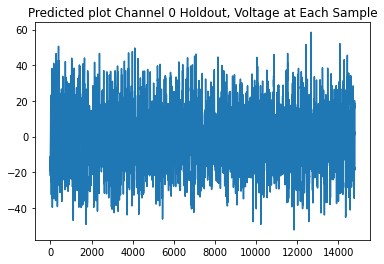

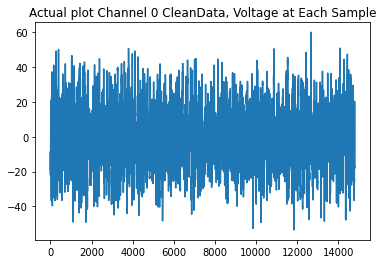

(14803, 72)
(148029, 72)


In [8]:
#0 means that the first chunk is the holdout set, right?

plt.title(f"Predicted plot Channel {chan} Holdout, Voltage at Each Sample")
plt.plot(range(1, 14803), pred[range(1,14803),chan], "-")
plt.show()

plt.title(f"Actual plot Channel {chan} CleanData, Voltage at Each Sample")
plt.plot(range(1, 14803), xClean[range(1,14803),chan], "-")
plt.show()
print(pred.shape)
print(xClean.shape)

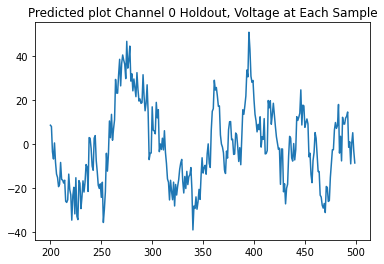

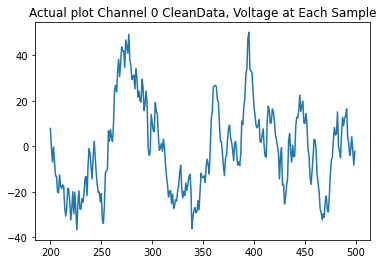

(14803, 72)
(148029, 72)


In [9]:
#HOLDOUT PREDICTED and REAL 200-500

plt.title(f"Predicted plot Channel {chan} Holdout, Voltage at Each Sample")
plt.plot(range(200, 500), pred[range(200,500),chan], "-", label = f"Predicted")
plt.show()

plt.title(f"Actual plot Channel {chan} CleanData, Voltage at Each Sample")
plt.plot(range(200, 500), xClean[range(200,500),chan], "-", label = f"Actual Data")
plt.show()
print(pred.shape)
print(xClean.shape)

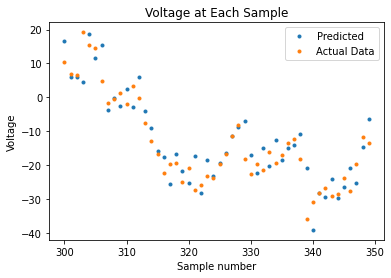

(14803, 72)
(148029, 72)


In [13]:
start = 300
stop = 350
plt.plot(range(start, stop), pred[range(start, stop),chan], ".", label = f"Predicted")


plt.title(f"Voltage at Each Sample")
plt.plot(range(start, stop), xClean[range(start, stop),chan], ".", label = f"Actual Data")
plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Voltage")
plt.show()
print(pred.shape)
print(xClean.shape)  #Blue is predicted, Orange is real

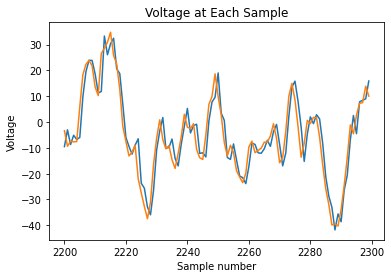

No handles with labels found to put in legend.


(14803, 72)
(148029, 72)


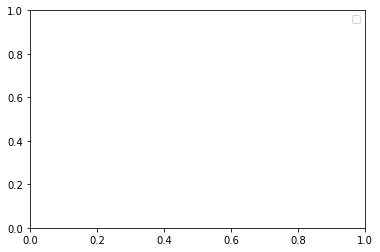

In [15]:
plt.plot(range(2200, 2300), pred[range(2200,2300),chan], "-", label = f"Predicted")


plt.title(f"Voltage at Each Sample")
plt.plot(range(2200, 2300), xClean[range(2200,2300),chan], "-", label = f"Actual Data")
plt.xlabel("Sample number")
plt.ylabel("Voltage")
plt.legend()
plt.show()

plt.legend()
print(pred.shape)
print(xClean.shape)  #Blue is predicted, Orange is real

NameError: name 'pred2' is not defined

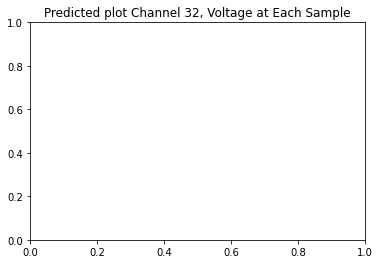

In [12]:
#FULL DATA, NO HOLDOUT


plt.title(f"Predicted plot Channel 32, Voltage at Each Sample")
plt.plot(range(1, 148030), pred2[:,chan], "-")
plt.show()

plt.title(f"Actual plot Channel 32, Voltage at Each Sample")
plt.plot(range(1, 148030), xClean[:,chan], "-")
plt.show()
print(pred2.shape)
print(xClean.shape)

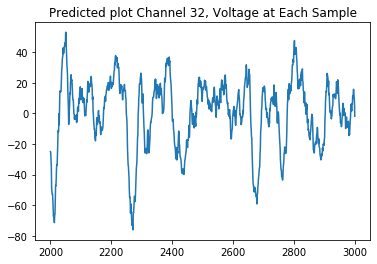

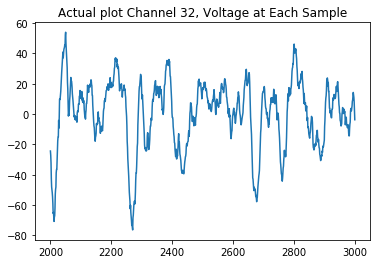

(148029, 72)
(148029, 72)


In [ ]:
#PART OF DATA, NO HOLDOUT

plt.title(f"Predicted plot Channel 32, Voltage at Each Sample")
plt.plot(range(2000, 3000), pred2[range(2000,3000),chan], "-")
#plt.show()

plt.title(f"Actual plot Channel 32, Voltage at Each Sample")
plt.plot(range(2000, 3000), xClean[range(2000,3000),chan], "-")
plt.show()
print(pred2.shape)
print(xClean.shape)